In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

In [5]:
df_activities = pd.read_csv('datasets/cardioActivities.csv', parse_dates=True, index_col='Date')

# Ask Questions

-
-

# Wrangle Data 

In [6]:
df_activities.head()

df_activities['Year'] = df_activities.index.year
df_activities.Duration = df_activities.Duration.apply(lambda x : int(x.split(":")[0]) * 60+ int(x.split(":")[1] if len(x)<=5 else int(x.split(":")[0]) * 60*60+ int(x.split(":")[1])*60+int(x.split(":")[2]
)))

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx


In [9]:
df_activities.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

In [11]:
df_activities.drop(['Route Name', "Friend's Tagged", 'Notes', 'GPX File'], axis = 1, inplace=True)

In [13]:
df_activities.Type.value_counts()

Running    459
Cycling     29
Walking     18
Other        2
Name: Type, dtype: int64

In [23]:


avg_running = df_activities[df_activities['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_cycling = df_activities[df_activities['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()
# avg_walking = df_activities[df_activities['Type'] == 'Walking']['Average Heart Rate (bpm)'].mean()

In [ ]:

df_run = df_activities[df_activities['Type'] == 'Running'].copy()
df_cycle = df_activities[df_activities['Type'] == 'Cycling'].copy()
# df_walk = df_activities[df_activities['Type'] == 'Walking'].copy()

In [25]:
df_run['Average Heart Rate (bpm)'].fillna(int(avg_running), inplace=True)
df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_cycling), inplace=True)
# df_walk['Average Heart Rate (bpm)'].fillna(int(avg_walking), inplace=True)

In [41]:
df_activities.Duration = df_activities.Duration.apply(lambda row: int(row.split(':')[0]) * 60 + 
                             int(row.split(':')[1]) if len(row.split(':')) <= 2 
                             else int(row.split(':')[0]) * 3600 + 
                             int(row.split(':')[1]) * 60 + int(row.split(':')[2]))


In [48]:
df_run.Duration = df_run.Duration.apply(lambda row: int(row.split(':')[0]) * 60 + 
                             int(row.split(':')[1]) if len(row.split(':')) <= 2 
                             else int(row.split(':')[0]) * 3600 + 
                             int(row.split(':')[1]) * 60 + int(row.split(':')[2]))


#  Answering Questions:

### Q1: How was my run?

Text(0.5, 1.0, 'How intense was my run?')

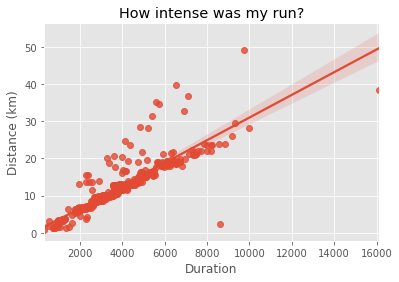

In [68]:
sns.regplot(data = df_activities, x = 'Duration', y = 'Distance (km)')
plt.xlabel('Duration')
plt.ylabel('Distance (km)')

plt.title("How intense was my run?")

### Q2: Did I achieve my yearly goal?

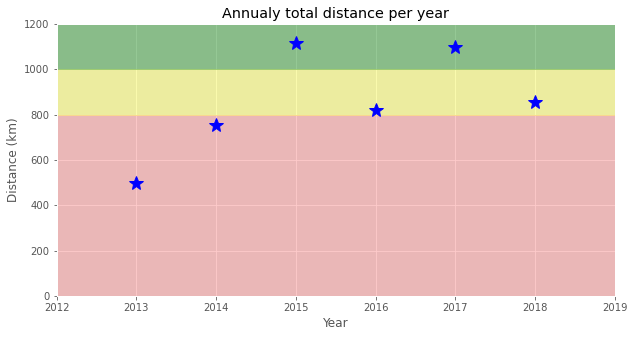

In [71]:
plt.style.use('ggplot')

df_run_distance_annually = df_run['2018':'2013']['Distance (km)'].resample('A').sum()

fig = plt.figure(figsize=(10,5))

ax = df_run_distance_annually.plot(marker = '*', markersize=14, color ='blue', linewidth=0)

ax.set(
    ylim=[0, 1200],
    xlim=['2012', '2019'],
    ylabel='Distance (km)',
    xlabel='Year',
    title='Annualy total distance per year'
)

ax.axhspan(0, 800, color='red', alpha=0.2)
ax.axhspan(800, 1000, color='yellow', alpha=0.3)
ax.axhspan(1000, 1200, color='green', alpha=0.4)


plt.show()